In [27]:
import matplotlib.pyplot as plt 
import pandas as pd 

### Se carga el archivo y las hojas relevantes

In [28]:

file_path = 'C:/PI2/datasets/Television.xlsx'  
excel_data = pd.ExcelFile(file_path)

In [29]:
sheets_data = {sheet: excel_data.parse(sheet) for sheet in excel_data.sheet_names}

In [33]:
total_accesses = sheets_data['Accesos_totales_TV']
revenues = sheets_data['Ingresos_TV']
revenues_sorted = revenues.sort_values(by=['Año', 'Trimestre'])

### Cálculo de KPI

In [34]:

kpi_data = {
    "average_subscription_access": total_accesses['Accesos TV por suscripción'].mean(),
    "average_satelital_access": total_accesses['Accesos TV satelital'].mean(),
    "revenue_growth": (
        revenues_sorted.iloc[-1]['Ingresos TV por suscripción  (miles de $)']
        - revenues_sorted.iloc[0]['Ingresos TV por suscripción  (miles de $)']
    ) / revenues_sorted.iloc[0]['Ingresos TV por suscripción  (miles de $)'] * 100
}


### Configuración de los datos para la gráfica
* Se crea un grafico combinado para poder representar el porcentaje de crecimiento en ingresos para que este sea visible y entendible

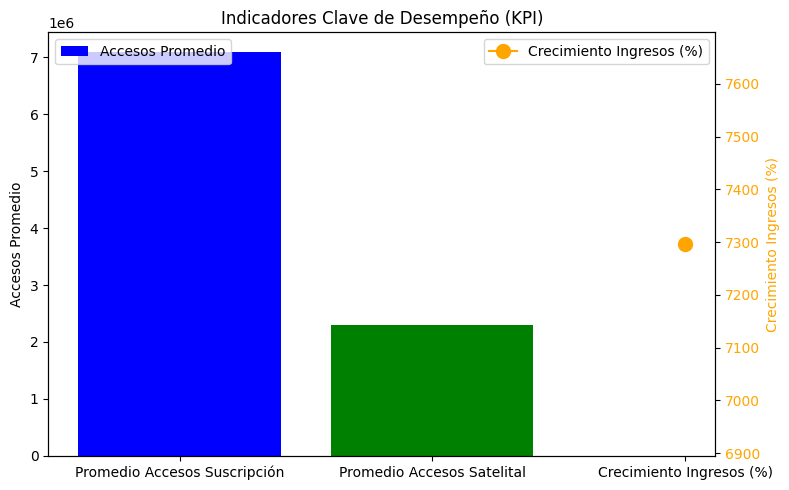

KPI Data:
Promedio de Accesos TV por Suscripción: 7086233.0
Promedio de Accesos TV Satelital: 2297207.5853658537
Crecimiento de Ingresos por TV por Suscripción: 7296.45%


In [36]:

kpi_names = ['Promedio Accesos Suscripción', 'Promedio Accesos Satelital']
kpi_values = [
    kpi_data['average_subscription_access'],
    kpi_data['average_satelital_access']
]
growth_value = kpi_data['revenue_growth']

fig, ax1 = plt.subplots(figsize=(8, 5))

# Eje principal: Gráfica de barras
bars = ax1.bar(kpi_names, kpi_values, color=['blue', 'green'], label="Accesos Promedio")
ax1.set_ylabel('Accesos Promedio', color='black')
ax1.set_title('Indicadores Clave de Desempeño (KPI)')

# Eje secundario: Línea para el crecimiento de ingresos
ax2 = ax1.twinx()
ax2.plot(['Crecimiento Ingresos (%)'], [growth_value], color='orange', marker='o', markersize=10, label="Crecimiento Ingresos (%)")
ax2.set_ylabel('Crecimiento Ingresos (%)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Ajustar y mostrar gráfico
plt.tight_layout()
plt.show()

# Imprimir KPI en consola
print("KPI Data:")
print(f"Promedio de Accesos TV por Suscripción: {kpi_data['average_subscription_access']}")
print(f"Promedio de Accesos TV Satelital: {kpi_data['average_satelital_access']}")
print(f"Crecimiento de Ingresos por TV por Suscripción: {kpi_data['revenue_growth']:.2f}%")

# Puntos clave en este KPI:

## Promedio de accesso TV por suscripcion
* Un número alto sugiere una alta adopción de este tipo de servicio en la población.
* Una tendencia creciente podría indicar que el mercado está satisfecho con este servicio o que la estrategia de precios y contenido está funcionando bien.

### Que podemos decidir en base a esto:
* El promedio es alto, por lo que las estrategias podrían **enfocarse** en retener clientes mediante promociones, ofertas exclusivas o mejoras en el servicio.

## Promedio de accesos TV satelital:
* Un número más bajo que el de TV por suscripción puede indicar que este servicio tiene un mercado más limitado, probablemente en áreas rurales o con menos acceso a internet.

 ### Decisiones que se pueden considerar con respecto a este punto:
* Si los accesos satelitales son importantes en regiones específicas, se podrían desarrollar estrategias específicas para estas áreas, como paquetes más atractivos o mejoras en la tecnología de transmisión, generalmente son zonas de dificl acceso ya sea de internet o de la infraestructura para dar dichos servicios, asi como tambien puede ser un factor la economia de dichas zonas.
